## 一些实用的函数

In [19]:
import numpy as np
import jax.numpy as jnp

#### 1. tile vs repeat

In [17]:
a = np.array([1,2,3])
print("tille:\n", jnp.tile(a, (2, 3)))
print("repeat:\n", jnp.repeat(a, 3, axis=-1))


tille:
 [[1 2 3 1 2 3 1 2 3]
 [1 2 3 1 2 3 1 2 3]]
repeat:
 [1 1 1 2 2 2 3 3 3]


In [3]:
import flax.linen as nn
import jax.numpy as jnp
import numpy as np
class Base2FourierFeatures(nn.Module):
  # Create Base 2 Fourier features
  @nn.compact
  def __call__(self, inputs):
    freqs = jnp.asarray(range(8), dtype=inputs.dtype) #[0, 1, ..., 7]
    w = 2.**freqs * 2 * jnp.pi
    w = jnp.tile(w[None, :], (1, inputs.shape[-1]))
    h = jnp.repeat(inputs, len(freqs), axis=-1)
    h *= w
    h = jnp.concatenate([jnp.sin(h), jnp.cos(h)], axis=-1)
    return h

#### 2. Dimension相关

In [25]:
# 2.1 
a = np.random.randn(3)   
print(a.shape,          # (3,)
      a[:,None].shape,  # (3,1)
      a[None,:].shape)  # (1,3)

(3,) (3, 1) (1, 3)


#### 3. Disribuion

In [120]:
import jax

key, rng = random.split(random.PRNGKey(0))
s = jax.nn.softmax(random.normal(rng, (5,)))
print("probability\n\t", s, "=> sum: %.2f"%jnp.sum(s)) 

key, *rngs = random.split(key,1001)
ss = jnp.array([random.categorical(rng, jnp.log(s)) for rng in rngs])  # categorical的用法
print("estimated: \n\t", jnp.array([jnp.mean(ss==i) for i in range(5)]))

probability
	 [0.01988041 0.01103293 0.6620016  0.27488098 0.03220405] => sum: 1.00
estimated: 
	 [0.017      0.011      0.642      0.30200002 0.028     ]


## 一些简单的工具

refer: https://flax.readthedocs.io/en/latest/guides/jax_for_the_impatient.html

一些简单的文字技巧：

1. 在interactive mode中执行文件命令：   
   参考：https://stackoverflow.com/a/4624521
``` python 
exec(open('script.py').read())
```

### random

In [36]:
from jax import jit

### ---- random test -----
# https://github.com/google/jax/issues/968#issuecomment-508179312

key = random.PRNGKey(0)  # <- initial
@jit
def split_and_sample(key):
  key, subkey = random.split(key)  # <- split
  val = random.normal(subkey, shape=(3,)) # <- usage
  return key, val

# split 多个 
key, *subkeys = random.split(key, 3)

why need `random.split`? 

In [19]:
key = random.PRNGKey(0)
print(random.normal(key, shape=(3,))) 
print(random.normal(key, shape=(3,)))  # remains same as previous

[ 1.8160863  -0.48262316  0.33988908]
[ 1.8160863  -0.48262316  0.33988908]


In [25]:
# correct usage
key, subkey = random.split(key)
print(random.normal(subkey, shape=(3,))) 
key, subkey = random.split(key)
print(random.normal(subkey, shape=(3,)))  

[ 0.06513273  0.9301752  -1.0317023 ]
[ 0.8145605  1.0554591 -0.3506622]


### Timeit的测试

In [12]:
%timeit -r3 -n5 sample_repeatedly_with_split(key)  # only in jupyter notebook

# 其他方法
import time, timeit
# method2
ttt = timeit.timeit(lambda : sample_repeatedly_with_split(key), number=10)
print('method2: takes %.4f secs' % (ttt / 10))

# method3
now = time.time()
sample_repeatedly_with_split(key)
print('method3: takes %.4f secs' % (time.time() - now))

103 ms ± 2 ms per loop (mean ± std. dev. of 3 runs, 5 loops each)
takes 0.1007 secs
takes 0.0941 secs


### Autoload功能


In [2]:
# Local imports from current directory - auto reload.
# Any changes you make to train.py will appear automatically.
%load_ext autoreload
%autoreload 2
from mycode.test import myNumber

In [5]:
myNumber()

1

## Plot相关

### 1. 简单的函数打印

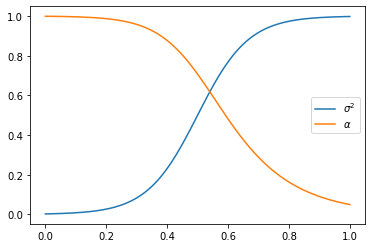

In [121]:
import numpy as np
import matplotlib.pyplot as plt

def gamma(ts, gamma_min=-6, gamma_max=6):
  return gamma_max + (gamma_min - gamma_max) * ts

def sigma2(gamma):
  return jax.nn.sigmoid(-gamma)

def alpha(gamma):
  return np.sqrt(1 - sigma2(gamma))

ts = np.linspace(0, 1, 1000)
plt.plot(ts, sigma2(gamma(ts)), label=r'$\sigma^2$')
plt.plot(ts, alpha(gamma(ts)), label=r'$\alpha$')
plt.legend();